In [1]:
# Author: Brandon Botzer
# Date: 3/13/2024
# Class: Penn State - AI 879

Problem:

Modify the code provided to identify circles in an image. Apply this to the “L06 sunflower.png Download L06 sunflower.png”.

For an implementation in MATLAB, check https://www.mathworks.com/help/images/ref/imfindcircles.html.Links to an external site.

Try two different radius range: (1) 1~20 and (2) 5~200, show results. Compare the result from two different settings and your analysis.

In [2]:
# Imports for functions

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2 as cv


# Showing the results of scipy computations
import pandas as pd

cv.__version__, ski.__version__

('4.8.1', '0.22.0')

In [3]:
# Read in image
image = ski.io.imread('L06 sunflower.png')

# Convert to grayscale for edge detection
image_gray = ski.color.rgb2gray(image)

# Convert to ubyte [0, 255] values (doing to make sure I get the [0, 255] as I've had problems in the past)
image_gray_ubyte = ski.util.img_as_ubyte(image=image_gray)

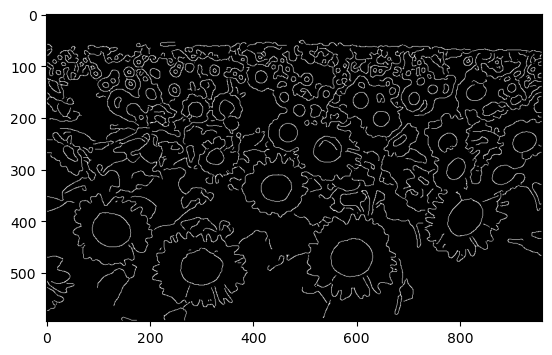

In [4]:
# Detect Edges to be passed into the Hough Transform

edges_canny = ski.feature.canny(image_gray_ubyte, sigma=3, low_threshold=10, high_threshold=50)
plt.imshow(edges_canny, cmap='gray')

# Radii Range 1-20

In [6]:
# Create a series of radii
range_small = np.arange(1,21,1)
range_small

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [7]:
# Run the Hough Transform
hough_im = ski.transform.hough_circle(edges_canny, range_small)

In [8]:
# Find the circle peaks from the Hough output
accum, cx, cy, rad = ski.transform.hough_circle_peaks(hough_im, range_small, total_num_peaks=20)

In [9]:
cx, cy, rad

(array([325,  80, 743, 578,   5, 577,  29, 225,  80, 328, 704, 612, 795,
        511, 831, 796, 669, 548, 578, 257]),
 array([566, 287,  66, 103, 126, 135, 137, 214, 277, 314, 333, 342, 345,
        406, 449, 458, 474, 560,  99, 101]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3]))

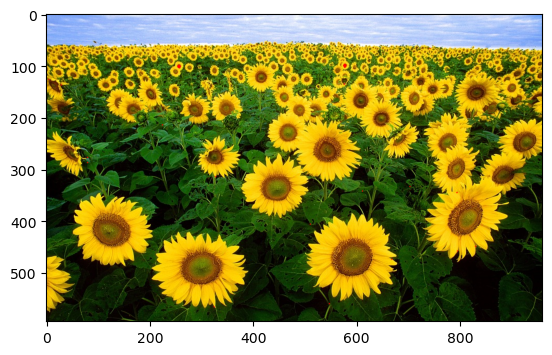

In [10]:
# Output the Circles on the image

# Read in the image again because I hit it with red in the last one
im1 = image.copy()

fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius)#, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    im1[circy, circx, :] = (255,0,0) # Draw red circle perimeter

    im1[row,col,:] = (255,0,0) # Fill in the circles (they're hard to see)

ax.imshow(im1)
plt.show()

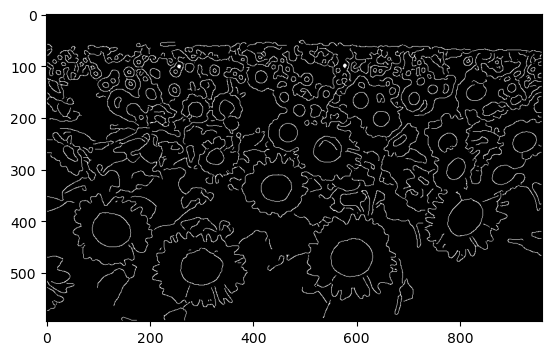

In [11]:
# Output the Circles on the canny edge

edges_canny_copy0 = edges_canny.copy()


fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    edges_canny_copy0[circy, circx] = 1 # Draw red circle perimeter

    edges_canny_copy0[row,col] = 1  # Fill in the circles (they're hard to see)

ax.imshow(edges_canny_copy0, cmap='gray')
plt.show()

The circles are still hard to see given that they have a radii of 1!  They can be seen if you look closely in the Edge detection image.

# Radii Range 5-200

In [31]:
range_large = np.arange(5,200,5)
range_large

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])

In [32]:
# Run the Hough Transform
hough_im = ski.transform.hough_circle(edges_canny, range_large)

In [33]:
# Find the circle peaks from the Hough output
accum, cx, cy, rad = ski.transform.hough_circle_peaks(hough_im, range_large, total_num_peaks=20)

In [34]:
cx, cy, rad, len(rad)

(array([116, 160, 609, 577, 857, 521, 179, 648, 163, 239, 326, 700, 722,
        819, 610,  96, 558, 712, 940, 250]),
 array([137, 112, 167, 129, 222,  78,  92, 202, 136,  91, 109, 114, 108,
         93, 137, 114, 541, 165, 121, 111]),
 array([ 5, 10, 15,  5,  5,  5, 10, 15, 10,  5, 10,  5,  5,  5,  5, 10,  5,
        10,  5, 10]),
 20)

In [35]:
# Read in the image again because I hit it with red in the last one
im2 = image.copy()

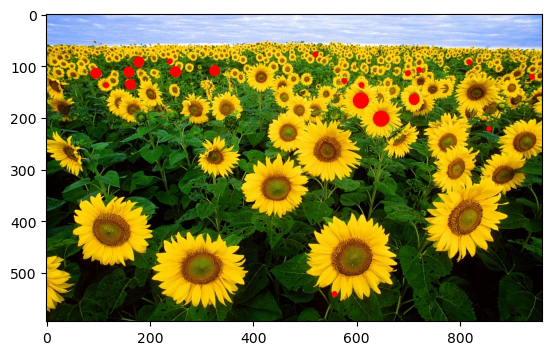

In [36]:
# Output the Circles on the image

fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    im2[circy, circx, :] = (255,0,0) # Draw red circle perimeter

    im2[row,col,:] = (255,0,0) # Fill in the circles (they're hard to see)

ax.imshow(im2)
plt.show()

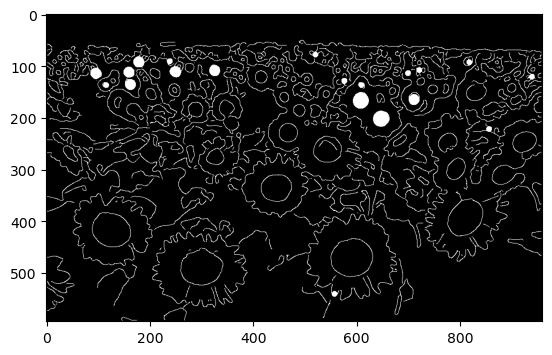

In [37]:
# Output the Circles on the canny edge

edges_canny_copy1 = edges_canny.copy()


fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    edges_canny_copy1[circy, circx] = 1 # Draw red circle perimeter

    edges_canny_copy1[row,col] = 1  # Fill in the circles (they're hard to see)

ax.imshow(edges_canny_copy1, cmap='gray')
plt.show()

While there are certainly many circles that have been found, some very prominent circles have been omitted.

After some playing around, this is highly dependent on the radii.

# Radii Range 20 - 75

In [19]:
range_test = np.arange(20,75,5)
range_test

array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

In [20]:
# Run the Hough Transform
hough_im = ski.transform.hough_circle(edges_canny, range_test)

In [21]:
# Find the circle peaks from the Hough output
accum, cx, cy, rad = ski.transform.hough_circle_peaks(hough_im, range_test, total_num_peaks=20)

In [22]:
cx, cy, rad, len(rad)

(array([441, 546, 205, 923, 144, 928, 884, 636, 541, 435, 779, 215, 726,
        543, 888, 759, 133, 436, 674, 572]),
 array([336, 261, 267, 249, 171, 252, 313, 119, 261,  88, 251, 196, 170,
        262, 317, 106, 420,  83,  93, 532]),
 array([25, 25, 20, 20, 25, 25, 20, 20, 25, 25, 20, 20, 25, 25, 25, 20, 30,
        20, 20, 20]),
 20)

In [23]:
# Read in the image again because I hit it with red in the last one
im3 = image.copy()

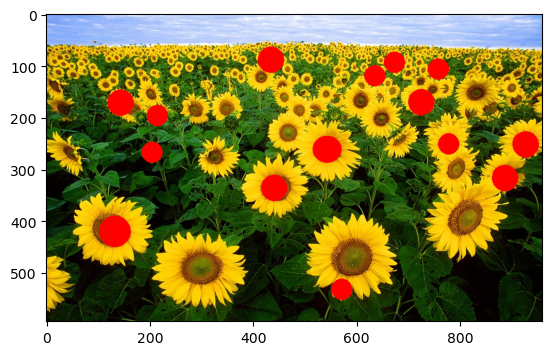

In [24]:
# Output the Circles on the image

fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    im3[circy, circx, :] = (255,0,0) # Draw red circle perimeter

    im3[row,col,:] = (255,0,0) # Fill in the circles (they're hard to see)

ax.imshow(im3)
plt.show()

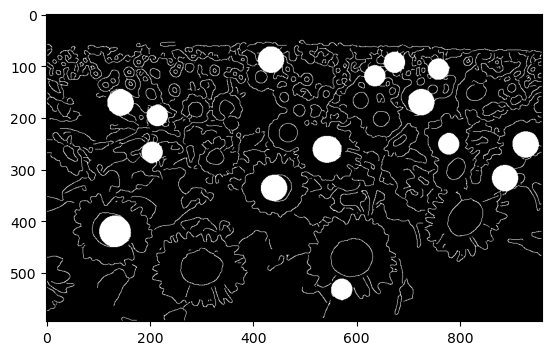

In [25]:
# Output the Circles on the canny edge

edges_canny_copy2 = edges_canny.copy()


fig, ax = plt.subplots()

for center_y, center_x, radius in zip(cy, cx, rad):
    circy, circx = ski.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)

    # The circles are hard to see, make a full red disk instead
    row, col = ski.draw.disk((center_y, center_x), radius, shape=image.shape)

    edges_canny_copy2[circy, circx] = 1 # Draw red circle perimeter

    edges_canny_copy2[row,col] = 1  # Fill in the circles (they're hard to see)

ax.imshow(edges_canny_copy2, cmap='gray')
plt.show()

# Showing a grid of the different radii finds

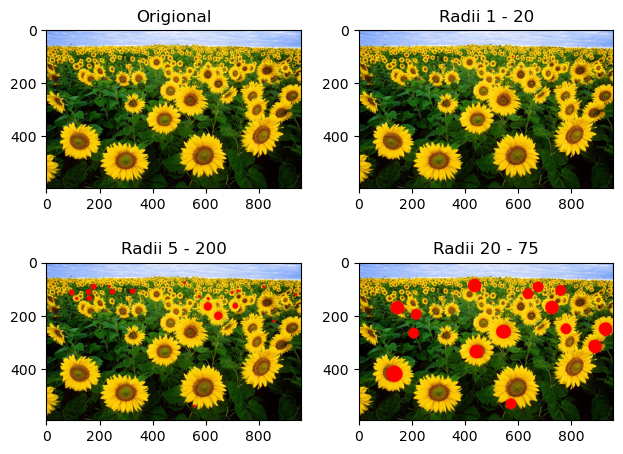

In [26]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()


ax[0,0].set_title('Origional')
ax[0,0].imshow(image)

ax[0,1].set_title('Radii 1 - 20')
ax[0,1].imshow(im1)

ax[1,0].set_title('Radii 5 - 200')
ax[1,0].imshow(im2)

ax[1,1].set_title('Radii 20 - 75')
ax[1,1].imshow(im3)

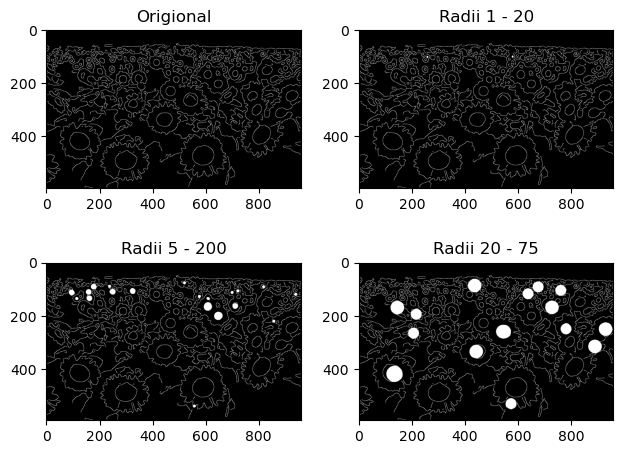

In [38]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()


ax[0,0].set_title('Origional')
ax[0,0].imshow(edges_canny, cmap='gray')

ax[0,1].set_title('Radii 1 - 20')
ax[0,1].imshow(edges_canny_copy0, cmap='gray')

ax[1,0].set_title('Radii 5 - 200')
ax[1,0].imshow(edges_canny_copy1, cmap='gray')

ax[1,1].set_title('Radii 20 - 75')
ax[1,1].imshow(edges_canny_copy2, cmap='gray')

Given that the circles detected are so dependent on the Hough Radii, selecting this parameter is of great importance.  In fact, it may be that in certain images, such as the sunflower image here, the process of detecting hough_circles should be run multiple times, at different radii ranges to detect as many circles as possible.

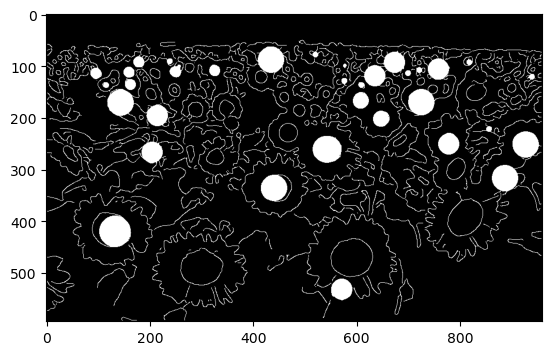

In [41]:
# Sum all the edge images to create a compiled mapping of circles
total = edges_canny + edges_canny_copy0 + edges_canny_copy1 + edges_canny_copy2

# Plot the combined image
plt.imshow(total, cmap='gray');